In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '../src/')
from titanic import *

/home/ian/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# importing data sets from kernel 

train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')
print('     In Training Set:')
identify_blanks(train)
print('     In Test Set:')
identify_blanks(test)
train.head()

     In Training Set:
column PassengerId has 0 missing values.  0%
column Survived has 0 missing values.  0%
column Pclass has 0 missing values.  0%
column Name has 0 missing values.  0%
column Sex has 0 missing values.  0%
column Age has 177 missing values.  19%
column SibSp has 0 missing values.  0%
column Parch has 0 missing values.  0%
column Ticket has 0 missing values.  0%
column Fare has 0 missing values.  0%
column Cabin has 687 missing values.  77%
column Embarked has 2 missing values.  0%
     In Test Set:
column PassengerId has 0 missing values.  0%
column Pclass has 0 missing values.  0%
column Name has 0 missing values.  0%
column Sex has 0 missing values.  0%
column Age has 86 missing values.  20%
column SibSp has 0 missing values.  0%
column Parch has 0 missing values.  0%
column Ticket has 0 missing values.  0%
column Fare has 1 missing values.  0%
column Cabin has 327 missing values.  78%
column Embarked has 0 missing values.  0%


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Fill missing data

In [3]:
df = one_hot_age_gender(train)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Boy,Girl,Man,Woman
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


In [4]:
m = len(df.loc[df['Man'] == 1])
w = len(df.loc[df['Woman'] == 1])
b = len(df.loc[df['Boy'] == 1])
g = len(df.loc[df['Girl'] == 1])
tot = m + w + b + g
print(f'Total Men:   {m}')
print(f'Total Woman: {w}')
print(f'Total Men:   {b}')
print(f'Total Woman: {g}')
print(f'All Records: {tot}')
len(df)

Total Men:   533
Total Woman: 235
Total Men:   44
Total Woman: 79
All Records: 891


891

In [5]:
df = split_cabin(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Boy,Girl,Man,Woman,Cabin Prefix,Cabin Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,NaN,<NA>
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,C,85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1,NaN,<NA>
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,C,123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,NaN,<NA>


In [6]:
df = append_one_hot(df, 'Embarked')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Boy,Girl,Man,Woman,Cabin Prefix,Cabin Number,Embarked C,Embarked Q,Embarked S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0,0,1,0,NaN,<NA>,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,0,0,0,1,C,85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0,0,1,NaN,<NA>,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,0,0,0,1,C,123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,0,1,0,NaN,<NA>,0,0,1


In [7]:
df = append_one_hot(df, 'Cabin Prefix')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked Q,Embarked S,Cabin Prefix A,Cabin Prefix B,Cabin Prefix C,Cabin Prefix D,Cabin Prefix E,Cabin Prefix F,Cabin Prefix G,Cabin Prefix T
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,1,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,0,0,0,0,0,0,0,0


Test Holdout Accuracy:   0.8116591928251121
Test Holdout Recall:     0.6888888888888889
Test Holdout Precision:  0.8157894736842105
Test Holdout F1:         0.746987951807229




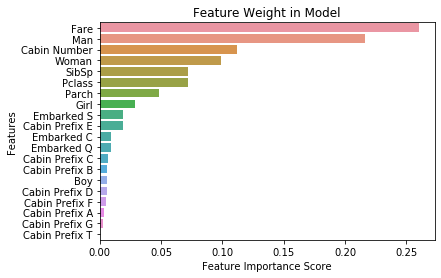




 Predicted    0   1
Actual            
0          119  14
1           28  62


In [8]:
no_age_df = df.drop(['Cabin Prefix', 'Embarked', 'Cabin', 'Ticket',
                      'Age', 'Sex', 'Name'], axis=1).set_index('PassengerId')
no_age_df['Cabin Number'] = no_age_df['Cabin Number'].fillna(0)
model = quick_random_forest(no_age_df, 'Survived')

In [9]:
df = fill_na_by_group(df, 'Age', ['Boy', 'Girl', 'Man', 'Woman'])
df.head()

Filling missing values for Boy with mean of 5.466749999999999
Filling missing values for Girl with mean of 7.209302325581396
Filling missing values for Man with mean of 33.17312348668281
Filling missing values for Woman with mean of 32.0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked Q,Embarked S,Cabin Prefix A,Cabin Prefix B,Cabin Prefix C,Cabin Prefix D,Cabin Prefix E,Cabin Prefix F,Cabin Prefix G,Cabin Prefix T
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,1,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,0,0,0,0,0,0,0,0


In [10]:
identify_blanks(df)

column PassengerId has 0 missing values.  0%
column Survived has 0 missing values.  0%
column Pclass has 0 missing values.  0%
column Name has 0 missing values.  0%
column Sex has 0 missing values.  0%
column Age has 0 missing values.  0%
column SibSp has 0 missing values.  0%
column Parch has 0 missing values.  0%
column Ticket has 0 missing values.  0%
column Fare has 0 missing values.  0%
column Cabin has 687 missing values.  77%
column Embarked has 0 missing values.  0%
column Boy has 0 missing values.  0%
column Girl has 0 missing values.  0%
column Man has 0 missing values.  0%
column Woman has 0 missing values.  0%
column Cabin Prefix has 0 missing values.  0%
column Cabin Number has 691 missing values.  77%
column Embarked C has 0 missing values.  0%
column Embarked Q has 0 missing values.  0%
column Embarked S has 0 missing values.  0%
column Cabin Prefix A has 0 missing values.  0%
column Cabin Prefix B has 0 missing values.  0%
column Cabin Prefix C has 0 missing values.  0%

Test Holdout Accuracy:   0.7488789237668162
Test Holdout Recall:     0.6444444444444445
Test Holdout Precision:  0.7073170731707317
Test Holdout F1:         0.6744186046511628




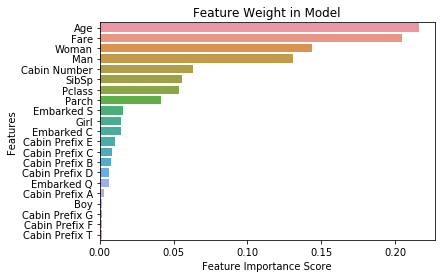




 Predicted    0   1
Actual            
0          109  24
1           32  58


In [11]:
w_age_df = df.drop(['Cabin Prefix', 'Embarked', 'Cabin', 'Ticket',
                      'Sex', 'Name'], axis=1).set_index('PassengerId')
w_age_df['Cabin Number'] = w_age_df['Cabin Number'].fillna(0)
model2 = quick_random_forest(w_age_df, 'Survived')

Test Holdout Accuracy:   0.7757847533632287
Test Holdout Recall:     0.6666666666666666
Test Holdout Precision:  0.75
Test Holdout F1:         0.7058823529411765




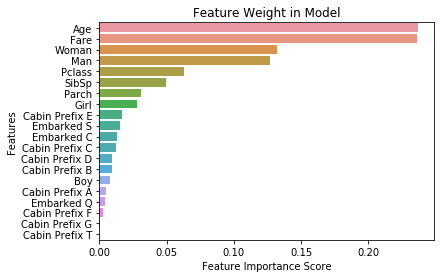




 Predicted    0   1
Actual            
0          113  20
1           30  60


In [12]:
w_age_df_no_cabin = df.drop(['Cabin Prefix', 'Embarked', 'Cabin', 'Ticket',
                      'Sex', 'Name', 'Cabin Number'], axis=1).set_index('PassengerId')

model3 = quick_random_forest(w_age_df_no_cabin, 'Survived')

In [13]:
df.loc[~df['Cabin Number'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked Q,Embarked S,Cabin Prefix A,Cabin Prefix B,Cabin Prefix C,Cabin Prefix D,Cabin Prefix E,Cabin Prefix F,Cabin Prefix G,Cabin Prefix T
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,1,0,0,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,0,1,0,0,0,0,1,0,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,...,0,1,0,0,0,0,0,0,1,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,...,0,1,0,0,0,1,0,0,0,0
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,...,0,1,0,1,0,0,0,0,0,0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,...,0,0,0,0,1,0,0,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,1,0,1,0,0,0,0,0,0


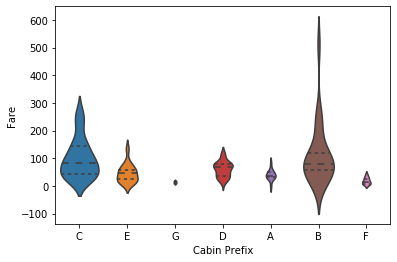

In [14]:
sns.violinplot(x="Cabin Prefix", y="Fare", 
    data=df.loc[~df['Cabin Number'].isnull()], scale="count", 
               inner="quartile")

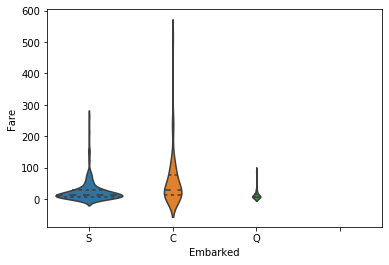

In [15]:
sns.violinplot(x="Embarked", y="Fare", 
    data=df, scale="count", inner="quartile")

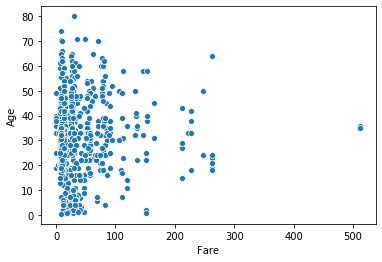

In [16]:
sns.scatterplot(x="Fare", y="Age", data=df)

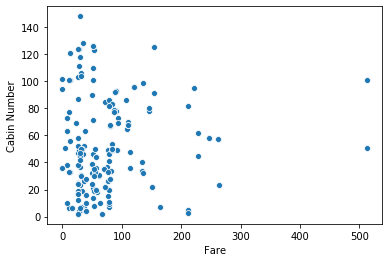

In [17]:
sns.scatterplot(x="Fare", y="Cabin Number", data=df.loc[~df['Cabin Number'].isnull()])

In [ ]:
#grid search params with first model
params1 = {
    
}







gs1 = GridSearchCV(model, params1)
gs1.fit(no_age_df)